In [1]:
import warnings
warnings.simplefilter(action='ignore',)

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=128)

import numpy as np
from pylab import cm
from sklearn.svm import SVC
from utils import train_test_split

In [2]:
DATA_FILEPATH = "dataset_graph7.csv"
train_x, train_y, test_x, test_y = train_test_split(DATA_FILEPATH)

R gate: 3
H gate: 0
CNOT gate: 0


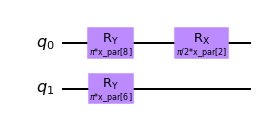

In [3]:
qc = QuantumCircuit(2)
x = ParameterVector('x_par', 14) 

print("R gate: 3\nH gate: 0\nCNOT gate: 0")

qc.ry(np.pi*x[8],0)
qc.rx((1/2)*np.pi*x[2],0)

qc.ry(np.pi*x[6],1)

qc.draw(output="mpl")

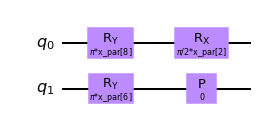

In [4]:
# Identity
qc.p(0*x[0]*x[1]*x[3]*x[4]*x[5]*x[7]*x[9]*x[10]*x[11]*x[12]*x[13],1)
qc.draw(output="mpl")

In [5]:
ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0
